# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [11]:
import math
import sys

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [13]:
# Load data, drop any missing data, sample 10 rows
df = pd.read_csv("wine_quality_red.tsv", sep = "\t")
df = df.dropna()
df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
754,7.8,0.480,0.68,1.70,0.415,14.0,32.0,0.99656,3.09,1.06,9.1,6
539,11.2,0.500,0.74,5.15,0.100,5.0,17.0,0.99960,3.22,0.62,11.2,5
1123,10.7,0.400,0.37,1.90,0.081,17.0,29.0,0.99674,3.12,0.65,11.2,6
980,9.1,0.500,0.30,1.90,0.065,8.0,17.0,0.99774,3.32,0.71,10.5,6
370,6.9,0.765,0.02,2.30,0.063,35.0,63.0,0.99750,3.57,0.78,9.9,5
679,10.8,0.260,0.45,3.30,0.060,20.0,49.0,0.99720,3.13,0.54,9.6,5
1214,10.2,0.330,0.46,1.90,0.081,6.0,9.0,0.99628,3.10,0.48,10.4,6
1283,8.7,0.630,0.28,2.70,0.096,17.0,69.0,0.99734,3.26,0.63,10.2,6
281,7.7,0.270,0.68,3.50,0.358,5.0,10.0,0.99720,3.25,1.08,9.9,7
764,9.1,0.680,0.11,2.80,0.093,11.0,44.0,0.99888,3.31,0.55,9.5,6


For this project, I chose to use the wine quality dataset. I started by downloading the raw dataset and importing it into my project folder. Then I loaded it, dropped any rows with missing data, and displayed 10 random samples. 

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [14]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'target'],
      dtype='object')

1. Fixed Acidity- This is the non-volatile acidity in wine, with non-volatile referring to a substance that does not easily evaporate into a gas.
2. Volatile Acidity- Volatile acidity represents the presence of gaseous acids such as acetic acid, and ethyl acetate in wine. 
3. Citric Acid- Citric acid is the organic acid in citrus fruits used as an additive or preservative.
4. Residual Sugar- This is the natural grape sugar that is leftover and unfermented in wine after yeast has finished converting them to alcohol/ethanol and carbon dioxide.
5. Chlorides- The natural salts that contribute to a wine's salinity that affects the flavor and color of wine. 
6. Free Sulfur Dioxide- Free sulfur dioxide protects the wine against oxidation and spoilage microbes. It acts as an antioxidant and microbial agent. 
7. Total Sulfur Dioxide-  Sum of the free sulfur dioxide and bound sulfur dioxide present in wine. Sulfur dioxide binds to sguars and pigments to prevent spoilage and oxidation. 
8. Density- Densiy refers to the mass per unit volume, influenced by the dissolved solids such as sugars/acids. It's can be used to measure wine quality and track fermentation progress.
9. pH- Represents the pH (acidity/basicity) of the wine. Wine's are typically acidic (pH<7) so the value should typically fall below 7 (neutral).
10. Sulphates- Sulfur containing compounds that are used ass preservatives, preventing spoilage and oxidation. 
11. Alchohol- Represents the percentage of ethanol that comes from the fermented grape sugars in wine measured as Alcohol By Volume (ABV).
12. Target- Represents the quality of the wine with scores between 0 and 10.

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

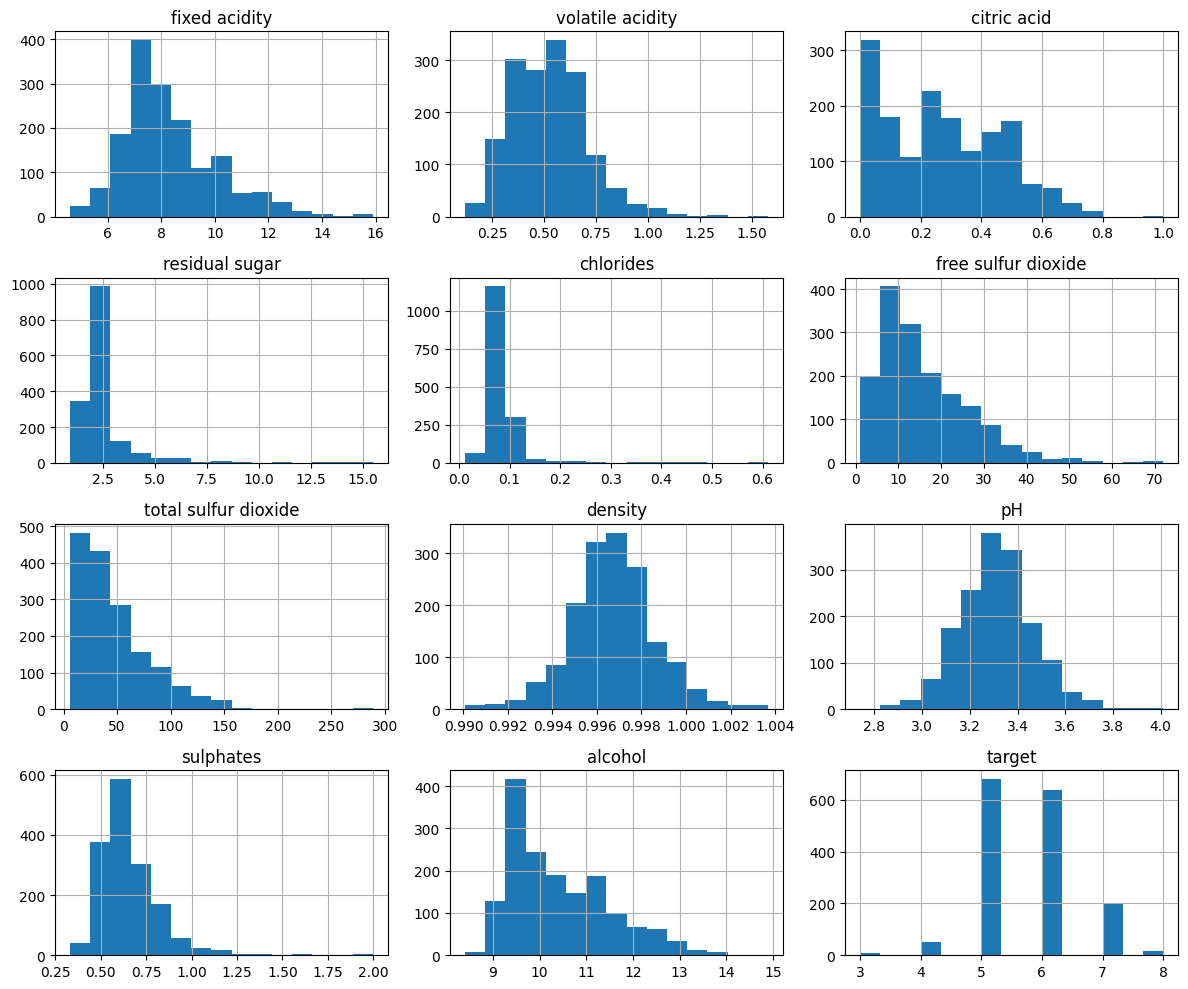

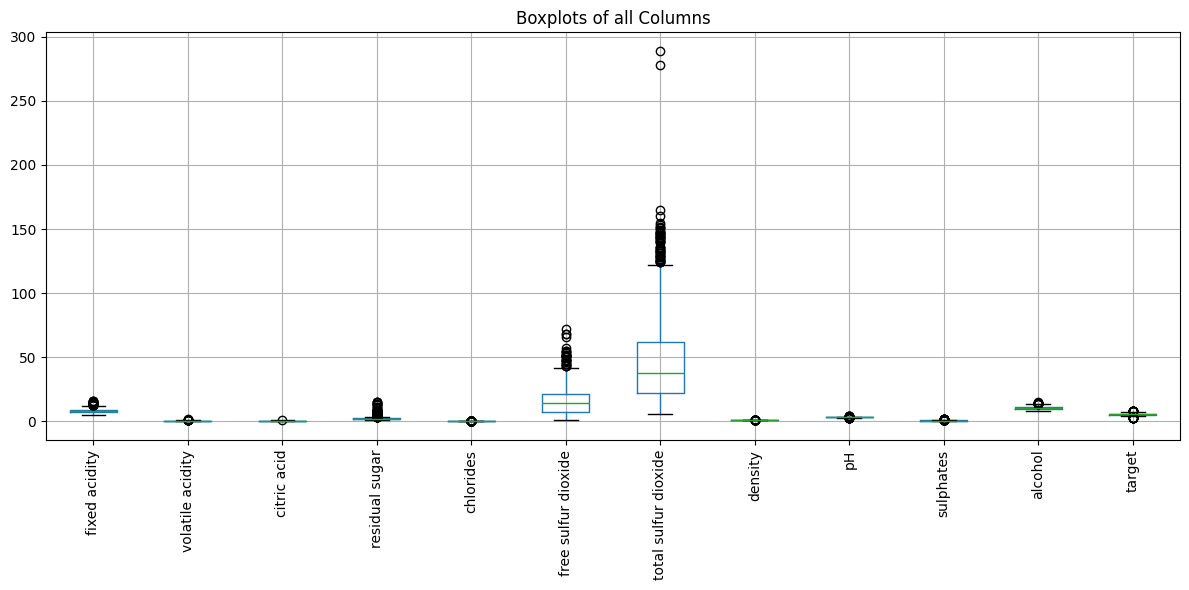

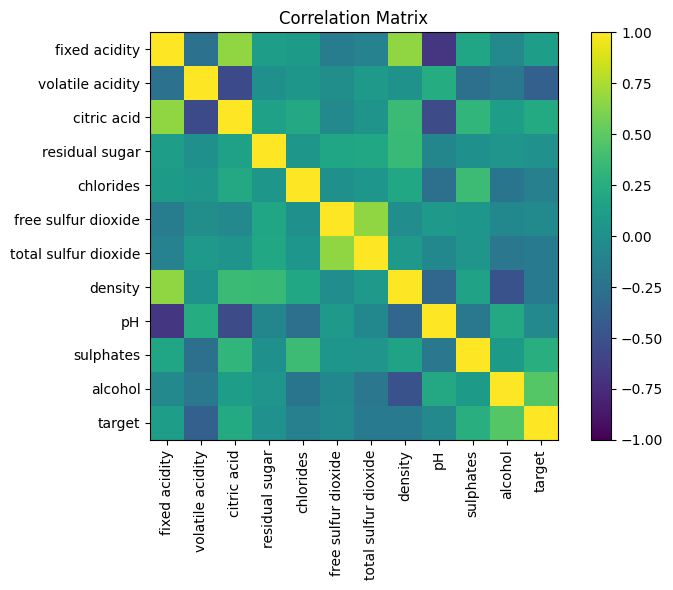

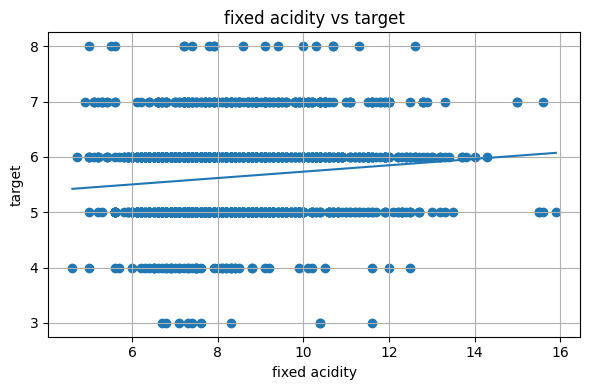

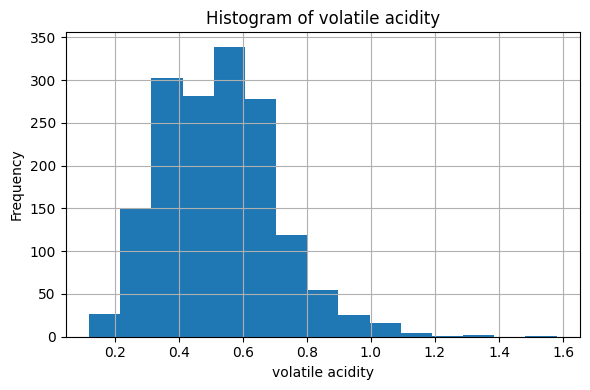

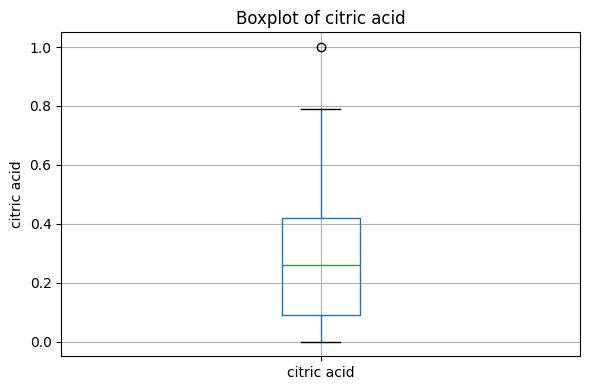

In [15]:
# Histograms of all columns
df.hist(figsize = (12, 10), bins = 15)
plt.tight_layout()
plt.show()

# Boxplots of all columns
plt.figure(figsize = (12, 6))
df.boxplot()
plt.xticks(rotation = 90)
plt.title("Boxplots of all Columns")
plt.tight_layout()
plt.show()

# Correlation matrix
corr = df.corr()

plt.figure(figsize = (8, 6))
plt.imshow(corr, vmin = -1, vmax = 1)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

# 3 individual charts: scatterplot, histogram, boxplot
target_col = "target"   
feature_cols = [c for c in df.columns if c != target_col]

# Scatterplot 
x_col = feature_cols[0]
x = df[x_col]
y = df[target_col]

plt.figure(figsize = (6, 4))
plt.grid(True)
plt.scatter(x, y)
plt.xlabel(x_col)
plt.ylabel(target_col)
plt.title(f"{x_col} vs {target_col}")

# line of best fit
slope, intercept = np.polyfit(x, y, 1)
line_x = np.linspace(x.min(), x.max(), 100)
line_y = slope * line_x + intercept
plt.plot(line_x, line_y)

plt.tight_layout()
plt.show()

# Histogram 
hist_col = feature_cols[1]

plt.figure(figsize = (6, 4))
plt.hist(df[hist_col], bins = 15)
plt.grid(True)
plt.xlabel(hist_col)
plt.ylabel("Frequency")
plt.title(f"Histogram of {hist_col}")
plt.tight_layout()
plt.show()

# Boxplot 
box_col = feature_cols[2]

plt.figure(figsize = (6, 4))
plt.grid(True)
df.boxplot(column = box_col)
plt.ylabel(box_col)
plt.title(f"Boxplot of {box_col}")
plt.tight_layout()
plt.show()


I performed exploratory analysis using histogram, boxplots, and a correlation matrix to better understand the distribution and relationships in the wine quality dataset. Many features, such as residual sugar and sulfur dioxide, exhibit right-skewed distributions with clear outliers, as shown in the boxplots. The correlation matrix shows that alcohol has the strongest positive relationship with wine quality,  while volatile acidity is negatively correlated. Between the individual charts, the scatterplot of fixed acidity versus the target shows only a weak trend with heavy overlap between quality scores. The histogram of volatile acidity highlights a skewed distribution, and the boxplot of citric acid reveals a narrow central range with several high-value outliers. Overall, these visualizations helped identify skewed features, outliers, and variables that are likely more influential in predicting wine quality. 

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

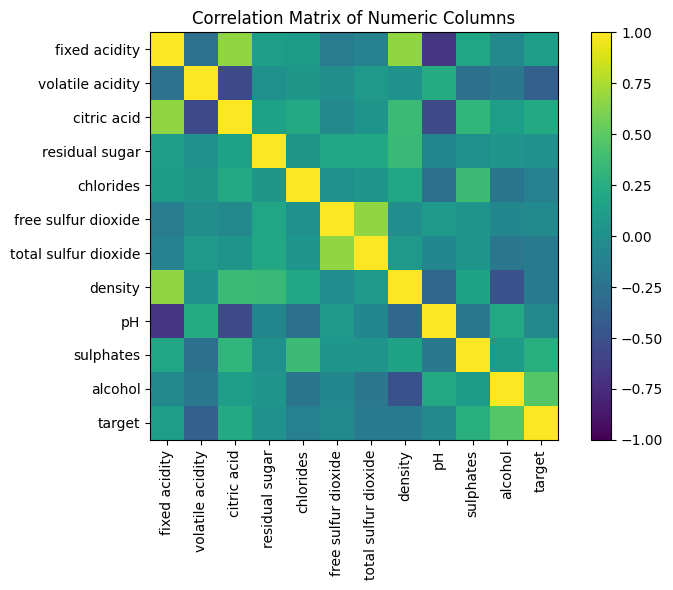

Most correlated pair of different columns:
fixed acidity and pH with correlation = -0.683


In [16]:
# Select numeric columns only
numeric_cols = df.select_dtypes(include = [np.number])
corr = numeric_cols.corr()

# Plot the correlation matrix
plt.figure(figsize = (8, 6))
plt.imshow(corr, vmin = -1, vmax = 1)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix of Numeric Columns")
plt.tight_layout()
plt.show()

# Find the most correlated pair of different columns
corr_matrix = corr.to_numpy()

# Mask the diagonal perfect corr with itself
np.fill_diagonal(corr_matrix, 0)

# Find index of max absolute value
max_idx = np.unravel_index(np.argmax(np.abs(corr_matrix)), corr_matrix.shape)
col1 = corr.columns[max_idx[0]]
col2 = corr.columns[max_idx[1]]
max_corr_value = corr.loc[col1, col2]

print("Most correlated pair of different columns:")
print(f"{col1} and {col2} with correlation = {max_corr_value:.3f}")

This correlation matrix summarizes the linear relationships among all numeric variables in the dataset, which indicates a strong positive or negative correlation. From the matrix, the strongest correlated pair of different columns is fixed acidity and pH, with a correlation of approximately -0.683. This strong negative correlation makes sense chemically, since higher acidity in wine corresponds to a lower pH value. The heatmap visually highlights this relationship with contrasting colors, making it easy to identify the strongest dependencies between the features.

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

1. Linear Regression

    https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

    https://www.youngwonks.com/blog/Getting-started-with-sklearn-Linear-Regression


2. Decision Tree

    https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

    https://www.geeksforgeeks.org/machine-learning/building-and-implementing-decision-tree-classifiers-with-scikit-learn-a-comprehensive-guide/


3. Random Forest

    https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

    https://www.geeksforgeeks.org/machine-learning/random-forest-algorithm-in-machine-learning/

### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

Linear Regression
 L1: 0.5004899635644883
 L2: 0.41676716722140794

Decision Tree
 L1: 0.4575743357102086
 L2: 0.3501528736781969

Random Forest
 L1: 0.4397364928336721
 L2: 0.30459519647021654


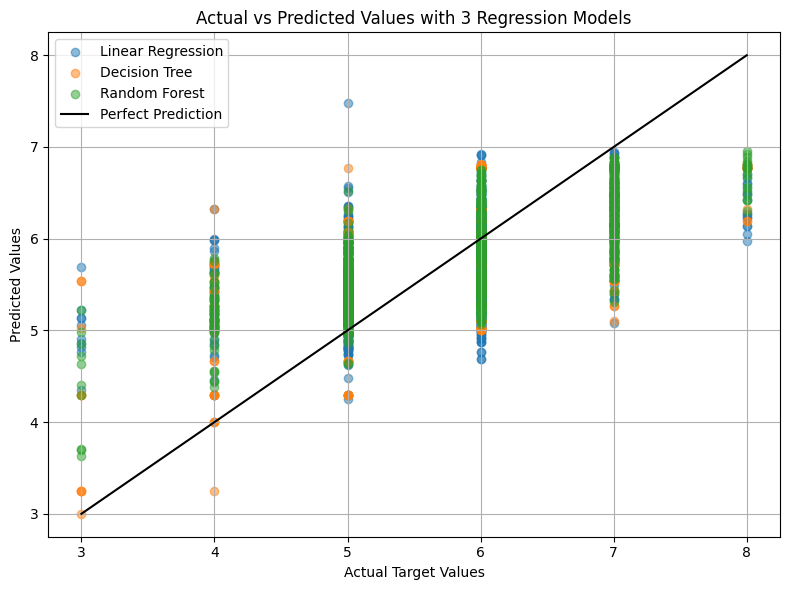

In [17]:
import sklearn.tree
import sklearn.ensemble

target_col = "target"
features = df.drop(columns=[target_col])
target = df[target_col]

# Models- linear regression, decision tree, random forest
lr = sklearn.linear_model.LinearRegression()
dt = sklearn.tree.DecisionTreeRegressor(max_depth = 5, random_state=0)
rf = sklearn.ensemble.RandomForestRegressor(n_estimators = 100, max_depth = 5, random_state = 0)

# Fit on entire dataset
lr.fit(features, target)
dt.fit(features, target)
rf.fit(features, target)

# Predict on entire dataset
pred_lr = lr.predict(features)
pred_dt = dt.predict(features)
pred_rf = rf.predict(features)

# L1 and L2 losses
def l1_loss(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def l2_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

print("Linear Regression")
print(" L1:", l1_loss(target, pred_lr))
print(" L2:", l2_loss(target, pred_lr))

print("\nDecision Tree")
print(" L1:", l1_loss(target, pred_dt))
print(" L2:", l2_loss(target, pred_dt))

print("\nRandom Forest")
print(" L1:", l1_loss(target, pred_rf))
print(" L2:", l2_loss(target, pred_rf))

# Actual vs Predicted for all three
plt.figure(figsize=(8, 6))
plt.scatter(target, pred_lr, alpha = 0.5, label = "Linear Regression")
plt.scatter(target, pred_dt, alpha = 0.5, label = "Decision Tree")
plt.scatter(target, pred_rf, alpha = 0.5, label = "Random Forest")

# Perfect prediction line
y_min = np.min(target)
y_max = np.max(target)
plt.plot([y_min, y_max], [y_min, y_max], "k-", label = "Perfect Prediction")

plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values with 3 Regression Models")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

For this regression model, I built linear, decision tree, and random forest regression models to compare L1 and L2 metrics and the actual versus predicted values. Linear regression produced the highest errors, with L2 loss of around 0.417. This indicates that a linear model is limited in capturing the relationship between features and wine quality. The decision tree improved performance and reduced the L2 loss to about 0.35, which shows that a nonlinear split may be better for capturing the feature interactions in the data. The random forest produced the lowest errors overall, with an L2 loss of about 0,305 and the lowest L1 loss as well. This demonstrated that averaging multiple trees to reduce variance is beneficial. This improvement is also visible in the plot, where the random forest predictions cluster closely around the perfect prediction line compared to the other models.

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

In [ ]:
# Target and feature columns
features = df.drop(columns=[target_col])
target = df[target_col]
target_col = "target"

# Convert to numpy arrays 
features_np = features.values
target_np = target.values

# Same regression models as problem 6
models = {
    "Linear Regression": sklearn.linear_model.LinearRegression(),
    "Decision Tree": sklearn.tree.DecisionTreeRegressor(max_depth=5, random_state=0),
    "Random Forest": sklearn.ensemble.RandomForestRegressor(
        n_estimators=100, max_depth=5, random_state=0
    )
}

# L2 loss function 
def l2_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Train models on the full dataset
full_data_losses = {}
for name, model in models.items():
    model.fit(features_np, target_np)
    preds = model.predict(features_np)
    full_data_losses[name] = l2_loss(target_np, preds)

# 5-fold cross-validation
k = 5
n = len(features_np)
indices = np.random.permutation(n)
folds = np.array_split(indices, k)
cv_losses = {name: [] for name in models}

for i in range(k):
    test_idx = folds[i]
    train_idx = np.hstack([folds[j] for j in range(k) if j != i])

    features_train, features_test = features_np[train_idx], features_np[test_idx]
    target_train, target_test = target_np[train_idx], target_np[test_idx]

    for name, model in models.items():
        model.fit(features_train, target_train)
        preds = model.predict(features_test)
        cv_losses[name].append(l2_loss(target_test, preds))

# Average cross-validation losses
avg_cv_losses = {name: np.mean(losses) for name, losses in cv_losses.items()}
for name in models:
    print(name)
    print("  Full data L2 loss:", full_data_losses[name])
    print("  Cross-validation L2 loss:", avg_cv_losses[name])
    print()

Linear Regression
  Full data L2 loss: 0.41676716722140794
  Cross-validation L2 loss: 0.42389825489599964

Decision Tree
  Full data L2 loss: 0.3501528736781969
  Cross-validation L2 loss: 0.4571607703808872

Random Forest
  Full data L2 loss: 0.30459519647021654
  Cross-validation L2 loss: 0.38643312079722103



Using the 5-fold cross-validation, I compared the L2 losses from training on the full dataset to those from the validation folds for my regression models. Linear regression showed very similar full-data and cross-validation losses, 0.417 vs 0.425, which demonstrates good generalization. The decision tree produced much lower L2 loss on the complete data set but a much higher loss on cross-validation, which could indicate overfitting to the training data. The random forests reduced overfitting and achieved a lower cross-validation loss of 0.391, while still maintaining a strong fit on the full dataset. Overall, these results show that while tree-based models can fit the training model well, specific methods like random forest can generalize better, while linear regression remains the most stable for training and validation. 

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Target and feature columns
target_col = "target"
features = df.drop(columns = [target_col]).values
target = df[target_col].values

# L2 loss (mean squared error)
def l2_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Pipelines with standardization

ridge_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", sklearn.linear_model.Ridge(alpha = 10.0))
])

lasso_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", sklearn.linear_model.Lasso(alpha = 0.01, max_iter = 10000))
])

elastic_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", sklearn.linear_model.ElasticNet(alpha=0.01, l1_ratio = 0.5, max_iter = 10000))
])

models = {
    "Ridge Regression": ridge_pipe,
    "Lasso Regression": lasso_pipe,
    "Elastic Net": elastic_pipe,
}

# Fit models and compute L2 losses
for name, model in models.items():
    model.fit(features, target)
    preds = model.predict(features)
    mse = l2_loss(target, preds)
    print(name)
    print("  L2 loss with standardized features:", mse)
    print()

Ridge Regression
  L2 loss with standardized features: 0.416777757785932

Lasso Regression
  L2 loss with standardized features: 0.4186071949831429

Elastic Net
  L2 loss with standardized features: 0.4175125206707354



After standardizing the features for the pipelines in each regression, each produced a similar L2 loss, around 0.417. Compared to problem 6, these results show a noticeable change for the regularized models. Mainly since scaling directly affects how ridge, lasso, and elastic net penalize coefficient sizes. However, none of the standardized models outperformed the earlier tree-based models. This shows that while standardization is essential for regularized linear models, the relationships in the win quality dataset are still largely linear models, and are not improved as much by adding regularization after scaling. 

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

You may find an improvement in some cases but, repeatedly training 1000 models through cross-validation is inefficient and could lead to overfitting.

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

The best model for this project was random forest regression, because it produced the lowest 5-fold cross-validated L2 loss. Random forest produced about an L2 loss of 0.391, while linear regression was about 0.425, and the single decision tree was 0.481. The decision tree had a low training L2 loss; its much higher CV loss indicates overfitting, while the random forest reduces the variance by averaging many trees and generalizes better. This is also visible in the actual vs. predicted plot. At the same time, the random forest predictions fall closer to the perfect prediction line across most quality scores, making it the most reliable model predicting wine quality from the features. 